In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import sys
import collections
%matplotlib inline

In [45]:
# constants
in_data_dir = "../data"
search_perfomance_dir = "search_performance"

until_data_path = os.path.join(in_data_dir, search_perfomance_dir)
until_data_path

'../data/search_performance'

In [46]:
# 読み込み対象としたいファイル名
target_file = "2020-02-13.csv"

In [133]:
# ==================================
#  Utils for Analyze
# ==================================

# google search console 検索パフォーマンスのデータの読み込み関数
def read_performance_csv(file_name):
    until_file_path = os.path.join(until_data_path, file_name)
    return pd.read_csv(until_file_path)

# 概要を表示
def display_describe(df):
    return df.describe()

# 何ページ目に表示されているかを算出
def calc_page_num(top_n, each_num=10):
    return math.floor(top_n / each_num) + 1

# %表示を小数点表示に変換
def per_to_float(per_str):
    return float(per_str[:-1]) / 100

## カラムの説明
- keyword -> 検索キーワード: 実際に検索に用いられている検索キーワード、もしくは組み合わせ
- click_num -> クリック数: 表示された回数の中で何度ページが開かれたか(クリックされたか)
- display_num -> 表示回数: 検索されたキーワードを元に何度も自身の投稿した記事が表示されたか(ヒットしたか)
- ctr -> CTR: クリック数 / 表示回数 によって算出される値。つまりは頻度
- top_n -> 掲載順位: 広告差し込みを除いて何番目に表示されているか

In [134]:
# google search console 検索パフォーマンスのデータの読み込み関数
def read_performance_csv(file_name):
    until_file_path = os.path.join(until_data_path, file_name)
    return pd.read_csv(until_file_path)

read_csv = read_performance_csv(target_file).rename(columns={
    "検索キーワード": "keyword",
    "クリック数": "click_num",
    "表示回数": "display_num",
    "CTR": "ctr",
    "掲載順位": "top_n"
})
read_csv

keyword  click_num  \
0                                         janome mecab         38   
1                                         mecab janome         32   
2                                      janome mecab 違い         12   
3                                        elixir python         10   
4                                      mecab tokenizer          7   
5                                  elixir optionparser          6   
6                                         janome 形態素解析          4   
7                                 cloud functions デプロイ          4   
8                                           elixir cli          4   
9                                      python 形態素解析 比較          3   
10                                       janome python          3   
11                                        python 形態素解析          3   
12                                       python elixir          3   
13                                      part_of_speech          3   
14                                    janome tokenizer          2   
15                               cloud function deploy          2   
16                                      ダイクストラ法 python          2   
17                                           elixir 入門          2   
18                                     mecab janome 比較          2   
19                                       python ダイクストラ          2   
20                                 optionparser elixir          2   
21   request had invalid authentication credentials...          2   
22                                               mecab          1   
23                                           形態素解析 ツール          1   
24                                       python janome          1   
25                                        形態素解析 python          1   
26                                        optionparser          1   
27                                    python responder          1   
28                                           elixir 定数          1   
29                                    janome.tokenizer          1   
..                                                 ...        ...   
539                                       ntt 電話 番号 調べ          0   
540                                           nttからの電話          0   
541                                              nttにし          0   
542                                        python 遅延評価          0   
543                                        どのjsが動いているか          0   
544                                             バイト 電話          0   
545                                         プログラミング 岐阜          0   
546                                 firebase-tools npm          0   
547                                         qiita 限定公開          0   
548                                             パイプ演算子          0   
549                                            丸の内 会議室          0   
550                                             出会い 通話          0   
551                                           const 代入          0   
552                              firebase hosting デプロイ          0   
553                                           アルバイト 感想          0   
554                                           ブログ運営 挫折          0   
555                                             加入電話とは          0   
556                                     firebase spark          0   
557                                        progate 使い方          0   
558                                                okb          0   
559                                   公務員から民間企業に転職した結果          0   
560                                           電話回線 ntt          0   
561                                               基礎解析          0   
562                                           ntt 電話加入          0   
563                                         ntt ipアドレス          0   
564                                        wantedly 企業          0   
565                                        ウォ

In [342]:
read_csv

keyword  click_num  \
0                                         janome mecab         38   
1                                         mecab janome         32   
2                                      janome mecab 違い         12   
3                                        elixir python         10   
4                                      mecab tokenizer          7   
5                                  elixir optionparser          6   
6                                         janome 形態素解析          4   
7                                 cloud functions デプロイ          4   
8                                           elixir cli          4   
9                                      python 形態素解析 比較          3   
10                                       janome python          3   
11                                        python 形態素解析          3   
12                                       python elixir          3   
13                                      part_of_speech          3   
14                                    janome tokenizer          2   
15                               cloud function deploy          2   
16                                      ダイクストラ法 python          2   
17                                           elixir 入門          2   
18                                     mecab janome 比較          2   
19                                       python ダイクストラ          2   
20                                 optionparser elixir          2   
21   request had invalid authentication credentials...          2   
22                                               mecab          1   
23                                           形態素解析 ツール          1   
24                                       python janome          1   
25                                        形態素解析 python          1   
26                                        optionparser          1   
27                                    python responder          1   
28                                           elixir 定数          1   
29                                    janome.tokenizer          1   
..                                                 ...        ...   
539                                       ntt 電話 番号 調べ          0   
540                                           nttからの電話          0   
541                                              nttにし          0   
542                                        python 遅延評価          0   
543                                        どのjsが動いているか          0   
544                                             バイト 電話          0   
545                                         プログラミング 岐阜          0   
546                                 firebase-tools npm          0   
547                                         qiita 限定公開          0   
548                                             パイプ演算子          0   
549                                            丸の内 会議室          0   
550                                             出会い 通話          0   
551                                           const 代入          0   
552                              firebase hosting デプロイ          0   
553                                           アルバイト 感想          0   
554                                           ブログ運営 挫折          0   
555                                             加入電話とは          0   
556                                     firebase spark          0   
557                                        progate 使い方          0   
558                                                okb          0   
559                                   公務員から民間企業に転職した結果          0   
560                                           電話回線 ntt          0   
561                                               基礎解析          0   
562                                           ntt 電話加入          0   
563                                         ntt ipアドレス          0   
564                                        wantedly 企業          0   
565                                        ウォ

In [135]:
# 中央値や、平均値などを確認
display_describe(read_csv)

click_num  display_num       top_n
count  569.000000   569.000000  569.000000
mean     0.314587     6.843585   48.686766
std      2.258275    19.082617   32.940964
min      0.000000     1.000000    2.000000
25%      0.000000     1.000000   21.500000
50%      0.000000     2.000000   43.000000
75%      0.000000     4.000000   73.860000
max     38.000000   215.000000  211.000000

## 結果の確認と考察
- 少なくとも検索結果として表示されれば3回に１度はクリックされている模様 -> 意外と多いと実感
- 掲載順位は大体が４ページ目ぐらい -> 何ぞやの調査で１ページ以降を閲覧する割合はかなり低かったのでこれは致命的
- 検索すれば２番目に表示される記事があることに驚きを隠せない
- 50%の時点で掲載順位の値が43(すなわち4ページ目)であるため、半数以上の記事は検索からの流入を期待出来ない

In [168]:
##　top_nの値から何ページ目に表示されているのかを算出してカラムに追加
add_page_num = read_csv.assign(
    page_num=lambda df: df.top_n.apply(lambda row: calc_page_num(row)),
    float_ctr=lambda df: df.ctr.apply(lambda row: per_to_float(row))
)

## ２番目に表示される記事が何なのかを確認 & １ページ目に表示されるkeywordの入力パターンを確認
display_on_one_page = add_page_num.sort_values("top_n")[add_page_num.page_num == 1]
display_on_one_page

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


keyword  click_num  display_num     ctr  top_n  \
18                    mecab janome 比較          2           14  14.29%   2.00   
2                     janome mecab 違い         12           37  32.43%   2.16   
1                        mecab janome         32          114  28.07%   2.99   
31               elixir option parser          1            6  16.67%   3.00   
0                        janome mecab         38          215  17.67%   3.18   
20                optionparser elixir          2            8     25%   3.38   
3                       elixir python         10           45  22.22%   4.13   
8                          elixir cli          4           27  14.81%   4.56   
4                     mecab tokenizer          7           68  10.29%   4.79   
298                  elixir constants          0            1      0%   5.00   
87                       elixir const          0           10      0%   5.10   
12                      python elixir          3           28  10.71%   5.68   
75             mecab tokenizer python          0           18      0%   5.94   
299     elixir command line arguments          0            1      0%   6.00   
13                     part_of_speech          3           20     15%   6.15   
28                          elixir 定数          1           10     10%   6.20   
88                      python-elixir          0           10      0%   6.60   
32                     elixir closure          1            6  16.67%   6.67   
302                        golang 関数型          0            1      0%   7.00   
301                       elixir rand          0            1      0%   7.00   
300                   elixir infinity          0            1      0%   7.00   
15              cloud function deploy          2           41   4.88%   7.46   
9                     python 形態素解析 比較          3          118   2.54%   7.50   
128                  functions deploy          0            5      0%   8.00   
303                       conpass 勉強会          0            1      0%   8.00   
304         firebase function node 10          0            1      0%   8.00   
305                        go言語 作れるもの          0            1      0%   8.00   
33     firebase cloud function deploy          1            6  16.67%   8.17   
168                          "golang"          0            3      0%   8.33   
169                   elixir constant          0            3      0%   8.33   
207                            erlang          0            2      0%   8.50   
208   firebase deploy cloud functions          0            2      0%   8.50   
206           cloud functions node 10          0            2      0%   8.50   
7                cloud functions デプロイ          4           67   5.97%   8.64   
170                      deploy cloud          0            3      0%   8.67   
145               elixir command line          0            4      0%   8.75   
55                            唐突な自分語り          0           71      0%   8.79   
307            cloud functions deploy          0            1      0%   9.00   
209  firebase cloud functions node 10          0            2      0%   9.00   
308                       contains 意味          0            1      0%   9.00   
310                     携帯電話はなぜつながるのか          0            1      0%   9.00   
309                  deploy functions          0            1      0%   9.00   
306            cloud function example          0            1      0%   9.00   
89         firebase functions node 10          0           10      0%   9.10   
6                        janome 形態素解析          4           85   4.71%   9.15   
171                       tokenizer()          0            3      0%   9.33   
95                       janome token          0            9      0%   9.33   
38            cloud function database          1            3  33.33%   9.33   
59                       形態素解析 janome          0           48      0%   9.38   
210              optionparser 

In [347]:
display_on_one_page = add_page_num.sort_values("top_n")[add_page_num.page_num > 4]
display_on_one_page

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


keyword  click_num  display_num    ctr   top_n  \
401       npm install firebase error          0            1     0%   40.00   
43                  python 並列処理 並行処理          1            2    50%   40.00   
248                          start b          0            2     0%   40.00   
82                       python 並行処理          0           13     0%   40.38   
249                     elixir guard          0            2     0%   40.50   
120                          ダイクストラ方          0            6     0%   40.83   
402                     elixir start          0            1     0%   41.00   
189             kubernetes websocket          0            3     0%   41.33   
190                   golang 変数 スコープ          0            3     0%   41.67   
62                    cloud function          0           37     0%   41.95   
403          cloud functions node.js          0            1     0%   42.00   
250                 tokenization 日本語          0            2     0%   42.00   
251                        形態素解析 api          0            2     0%   42.00   
404                  enum map elixir          0            1     0%   42.00   
405           golang cloud functions          0            1     0%   42.00   
191  firebase cloud functions python          0            3     0%   42.00   
252                          知恵袋 面白い          0            2     0%   42.50   
23                         形態素解析 ツール          1          159  0.63%   42.53   
52             golang docker-compose          1            1   100%   43.00   
407                            清流 定義          0            1     0%   43.00   
406               firebase-functions          0            1     0%   43.00   
253                       elixir 関数型          0            2     0%   43.50   
107                      python 呼び出し          0            7     0%   43.71   
409                      golang 並行処理          0            1     0%   44.00   
410                       mecab 名詞だけ          0            1     0%   44.00   
254                  elixir enum map          0            2     0%   44.00   
408                firebase function          0            1     0%   44.00   
121                  python tokenize          0            6     0%   44.17   
411                 coderetreat 2019          0            1     0%   45.00   
412                       connpassとは          0            1     0%   46.00   
..                               ...        ...          ...    ...     ...   
540                         nttからの電話          0            1     0%   97.00   
539                     ntt 電話 番号 調べ          0            1     0%   97.00   
546               firebase-tools npm          0            1     0%   98.00   
547                       qiita 限定公開          0            1     0%   98.00   
548                           パイプ演算子          0            1     0%   98.00   
549                          丸の内 会議室          0            1     0%   98.00   
550                           出会い 通話          0            1     0%   98.00   
555                           加入電話とは          0            1     0%   99.00   
554                         ブログ運営 挫折          0            1     0%   99.00   
551                         const 代入          0            1     0%   99.00   
552            firebase hosting デプロイ          0            1     0%   99.00   
553                         アルバイト 感想          0            1     0%   99.00   
556                   firebase spark          0            1     0%  100.00   
557                      progate 使い方          0            1     0%  100.00   
558                              okb          0            1     0%  101.00   
295                     wantedly 使い方          0            2     0%  102.50   
559                 公務員から民間企業に転職した結果          0            1     0%  103.00   
560                         電話回線 ntt          0            1     0%  105.00   
561                             基礎解析          0            1     0%  106.00   


In [228]:
# 1ページに表示されるが、クリックされるキーワードの組み合わせ数はもっと少ない
one_page_and_clicked_keywords = display_on_one_page[display_on_one_page.float_ctr != 0]
print("counts: ", len(one_page_and_clicked_keywords))
one_page_and_clicked_keywords

counts:  19


keyword  click_num  display_num     ctr  top_n  \
18                 mecab janome 比較          2           14  14.29%   2.00   
2                  janome mecab 違い         12           37  32.43%   2.16   
1                     mecab janome         32          114  28.07%   2.99   
31            elixir option parser          1            6  16.67%   3.00   
0                     janome mecab         38          215  17.67%   3.18   
20             optionparser elixir          2            8     25%   3.38   
3                    elixir python         10           45  22.22%   4.13   
8                       elixir cli          4           27  14.81%   4.56   
4                  mecab tokenizer          7           68  10.29%   4.79   
12                   python elixir          3           28  10.71%   5.68   
13                  part_of_speech          3           20     15%   6.15   
28                       elixir 定数          1           10     10%   6.20   
32                  elixir closure          1            6  16.67%   6.67   
15           cloud function deploy          2           41   4.88%   7.46   
9                  python 形態素解析 比較          3          118   2.54%   7.50   
33  firebase cloud function deploy          1            6  16.67%   8.17   
7             cloud functions デプロイ          4           67   5.97%   8.64   
6                     janome 形態素解析          4           85   4.71%   9.15   
38         cloud function database          1            3  33.33%   9.33   

    page_num  float_ctr  
18         1     0.1429  
2          1     0.3243  
1          1     0.2807  
31         1     0.1667  
0          1     0.1767  
20         1     0.2500  
3          1     0.2222  
8          1     0.1481  
4          1     0.1029  
12         1     0.1071  
13         1     0.1500  
28         1     0.1000  
32         1     0.1667  
15         1     0.0488  
9          1     0.0254  
33         1     0.1667  
7          1     0.0597  
6          1     0.0471  
38         1     0.3333

In [289]:
# その中で際頻出の単語
splied_words = [w.split(" ") for w in one_page_and_clicked_keywords.keyword.tolist()]
splied_words = sum(splied_words, [])
count_words = collections.Counter(splied_words)

# グラフ化すると文字サイズで潰れるので出力で確認
for k, v in count_words.items():
    print(f"[info]: {k}: {v}")

# 頻出単語の上位５件
top_5 = sorted(count_words.items(), key=lambda x:x[1])[-5:]
top_5

[info]: mecab: 5
[info]: janome: 5
[info]: 比較: 2
[info]: 違い: 1
[info]: elixir: 7
[info]: option: 1
[info]: parser: 1
[info]: optionparser: 1
[info]: python: 3
[info]: cli: 1
[info]: tokenizer: 1
[info]: part_of_speech: 1
[info]: 定数: 1
[info]: closure: 1
[info]: cloud: 4
[info]: function: 3
[info]: deploy: 2
[info]: 形態素解析: 2
[info]: firebase: 1
[info]: functions: 1
[info]: デプロイ: 1
[info]: database: 1


[('function', 3), ('cloud', 4), ('mecab', 5), ('janome', 5), ('elixir', 7)]

## 頻出キーワードからの考察
- 自分が抑えたいElixirの単語が含まれているのは素直に嬉しい
- その一方でほとんど意識していない「mecab, janome」のような形態素解析に関連する単語, 「function, cloud」、これは絶対にcloud function...　というようにやはり世間のトレンドとなるトピックを指定するのが重要だと感じる
- 上位に現れている単語は具体的なものが多く、調べたい内容が一目で分かる。(closureとかtokenizerとか)
- いうて2回だが、このデータ数を考えると「比較」という単語がパワーを持っているのだと考えられる

In [337]:
# 上位の頻出キーワードを含む検索キーワードの組み合わせの確認
def res_df_contains_speced_keyword(df, keyword, ctr_valida=False):
    # df -> google search conosleからdownloadされるcsvの形式をDataFrameに変換したもの
    filtered = df.assign(
        is_contains=lambda df: df.keyword.apply(lambda row: keyword in row)
    )
    
    # ctrが0%の値を除去するかどうか
    if ctr_valida:
        filtered =  filtered[filtered.float_ctr != 0]
    
    return filtered[filtered.is_contains == True].drop("is_contains", axis=1).sort_values(by=["float_ctr", "display_num"], ascending=False)

# ほぼloggerみたいなの
def display_res(res, index):
    print("keyword: ", res[index][0])
    return res[index][1]

In [338]:
# top_5の単語が含まれている検索キーワードの組み合わせを確認
res = [(keyword[0], res_df_contains_speced_keyword(add_page_num, keyword[0], True)) for keyword in top_5]

In [339]:
display_res(res, 0)

keyword:  function


keyword  click_num  display_num     ctr  top_n  \
45  firebase cloud functions example          1            1    100%  11.00   
44             firebase functions 言語          1            2     50%  47.00   
38           cloud function database          1            3  33.33%   9.33   
33    firebase cloud function deploy          1            6  16.67%   8.17   
7               cloud functions デプロイ          4           67   5.97%   8.64   
15             cloud function deploy          2           41   4.88%   7.46   

    page_num  float_ctr  
45         2     1.0000  
44         5     0.5000  
38         1     0.3333  
33         1     0.1667  
7          1     0.0597  
15         1     0.0488

In [340]:
display_res(res, 1)

keyword:  cloud


keyword  click_num  display_num     ctr  top_n  \
45  firebase cloud functions example          1            1    100%  11.00   
38           cloud function database          1            3  33.33%   9.33   
33    firebase cloud function deploy          1            6  16.67%   8.17   
7               cloud functions デプロイ          4           67   5.97%   8.64   
15             cloud function deploy          2           41   4.88%   7.46   

    page_num  float_ctr  
45         2     1.0000  
38         1     0.3333  
33         1     0.1667  
7          1     0.0597  
15         1     0.0488

In [341]:
display_res(res, 2)

keyword:  mecab


keyword  click_num  display_num     ctr  top_n  page_num  \
2   janome mecab 違い         12           37  32.43%   2.16         1   
1      mecab janome         32          114  28.07%   2.99         1   
0      janome mecab         38          215  17.67%   3.18         1   
18  mecab janome 比較          2           14  14.29%   2.00         1   
4   mecab tokenizer          7           68  10.29%   4.79         1   
22            mecab          1          177   0.56%  67.29         7   

    float_ctr  
2      0.3243  
1      0.2807  
0      0.1767  
18     0.1429  
4      0.1029  
22     0.0056

In [333]:
display_res(res, 3)

keyword:  janome


keyword  click_num  display_num     ctr  top_n  page_num  \
39         janome 品詞          1            3  33.33%  17.00         2   
2    janome mecab 違い         12           37  32.43%   2.16         1   
1       mecab janome         32          114  28.07%   2.99         1   
37       janome 名詞のみ          1            4     25%  10.00         2   
0       janome mecab         38          215  17.67%   3.18         1   
18   mecab janome 比較          2           14  14.29%   2.00         1   
29  janome.tokenizer          1           10     10%  12.20         2   
14  janome tokenizer          2           42   4.76%  10.81         2   
6       janome 形態素解析          4           85   4.71%   9.15         1   
10     janome python          3           67   4.48%  15.54         2   
24     python janome          1           58   1.72%  16.36         2   

    float_ctr  
39     0.3333  
2      0.3243  
1      0.2807  
37     0.2500  
0      0.1767  
18     0.1429  
29     0.1000  
14     0.0476  
6      0.0471  
10     0.0448  
24     0.0172

In [334]:
display_res(res, 4)

keyword:  elixir


keyword  click_num  display_num     ctr  top_n  \
46              elixir cli app          1            1    100%  13.00   
47  elixir genserver terminate          1            1    100%  16.00   
51                   elixir 言語          1            1    100%  33.00   
42                  elixir csv          1            2     50%  15.50   
5          elixir optionparser          6           18  33.33%  13.33   
40               elixir vscode          1            3  33.33%  29.67   
20         optionparser elixir          2            8     25%   3.38   
3                elixir python         10           45  22.22%   4.13   
31        elixir option parser          1            6  16.67%   3.00   
32              elixir closure          1            6  16.67%   6.67   
8                   elixir cli          4           27  14.81%   4.56   
12               python elixir          3           28  10.71%   5.68   
28                   elixir 定数          1           10     10%   6.20   
17                   elixir 入門          2           21   9.52%  29.86   

    page_num  float_ctr  
46         2     1.0000  
47         2     1.0000  
51         4     1.0000  
42         2     0.5000  
5          2     0.3333  
40         3     0.3333  
20         1     0.2500  
3          1     0.2222  
31         1     0.1667  
32         1     0.1667  
8          1     0.1481  
12         1     0.1071  
28         1     0.1000  
17         3     0.0952

# ページ番号とCTRについての考察

In [220]:
# Nページに表示される項目をカウント
page_num_counts = add_page_num.page_num.value_counts().to_dict()
plt.pie(
    np.array([v for _, v in page_num_counts.items()]),
    counterclock=False,
    startangle=90,
    autopct="%1.1f%%",
    labels=[k for k, _ in page_num_counts.items()],
)
plt.show()

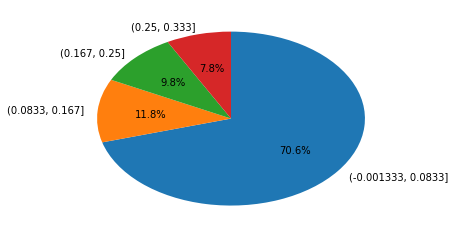

In [221]:
# bins=4(色々と試して4がいい感じに見えるので結果的に4でfix)で度数分布を確認
frequency = display_on_one_page.float_ctr.value_counts(bins=4)

# 各度数分布の割合を確認
ctr_rate = [n / sum(frequency) for n in frequency]
plt.pie(
    np.array(ctr_rate), 
    labels= [k for k, v in frequency.to_dict().items()],
    counterclock=False,
    startangle=90,
    autopct="%1.1f%%",
)
plt.show()

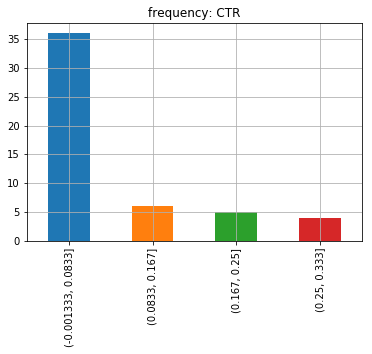

In [158]:
# CTRの度数分布を可視化
frequency.plot(kind="bar", title="frequency: CTR", grid=True)

## CTRの分布より
- トップページに表示されるキーワードの組み合わせのうち、クリックされうる可能性が10%を超えるのは全体の30%にも満たない
- その上、そもそも１ページ目に表示されるキーワードの組み合わせが全体の9%程度